<p style="background-color:#198D4B;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Spotify Şarkıları</b></p>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Spotify_logo_with_text.svg/2560px-Spotify_logo_with_text.svg.png" width="400" height="400"/>
</div>

# <font color='#24C06A'> <b>Giriş</b><font color='black'> 

Bu projede, müzik endüstrisine dair çeşitli metrikleri analiz etmek için veri analiz ve görselleştirme teknikleri kullanılmıştır. Proje kapsamında kullanılan veri seti, gerçek dünya verilerini temsil etmeyen, yalnızca bu çalışma için özel olarak **ChatGPT tarafından oluşturulmuş bir kurgusal veri setidir**. Dolayısıyla, analizlerde elde edilen sonuçlar, müzik endüstrisinin gerçek durumu hakkında doğrudan bilgi vermemektedir; bunun yerine veri analizi becerilerinin sergilenmesi ve görselleştirme tekniklerinin uygulanması amacıyla üretilmiştir.

Bu çalışma, veri hazırlama ve görselleştirme adımlarının analitik düşünme sürecindeki önemini göstermeyi ve müzik verileriyle ilgili bazı temel analizlerin nasıl yapılabileceğine dair örnek sunmayı amaçlamaktadır. Elde edilen sonuçlar, müzik endüstrisinin yapısına dair fikir verse de, verilerin kurgusal olduğu unutulmamalıdır.

<font color='#24C06A'> <b>İçindekiler:</b><font color='black'> 
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunların Düzenlenmesi</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
<li><a href="#conclusion">Sonuç</a></li>
</ul>

<a id='import-library'></a>
# <font color='#24C06A'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#24C06A'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [57]:
df0 = pd.read_csv("spotify_songs_dataset.csv")
df = df0.copy()

In [58]:
df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [59]:
df.sample(5)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
46410,SP46411,Say full.,Paul Herman,Describe site.,Hip-Hop,1996-08-12,248.0,62,26823417,English,No,Def Jam,David Wilson,Douglas Scott,NaN
48456,SP48457,Generation standard avoid.,Jenny Gonzales,Under able.,Jazz,2010-10-22,243.0,54,595878,German,No,Sony Music,Amy Maldonado,James Simmons,NaN
12215,SP12216,Head coach ground.,Samantha Lamb,Person.,Pop,1997-03-11,322.0,6,5960139,English,No,Universal Music,Michael Young,Ronald Alexander,Dustin Barnes
41421,SP41422,Among guy with.,Andrea Dunn,Reality process.,Electronic,2001-11-23,287.0,44,78489620,English,Yes,Universal Music,Rachel Mckay,Eric Lloyd,Darrell Thomas
7947,SP7948,Prove idea.,Calvin Brown,Change.,Pop,2013-03-31,293.0,17,2922470,Spanish,No,Def Jam,Jennifer Peters MD,Larry White,NaN


<a id='understanding-dataset'></a>
# <font color='#24C06A'> <b>Veri Setini Anlama</b><font color='black'> 

 - **song_id:** Şarkının benzersiz kimliği.
 - **song_title:** Şarkının adı.
 - **artist:** Şarkıyı seslendiren sanatçı.
 - **album:** Şarkının yer aldığı albüm.
 - **genre:** Şarkının müzik türü.
 - **release_date:** Şarkının yayınlandığı tarih.
 - **duration:** Şarkının süresi (saniye cinsinden).
 - **popularity:** Şarkının popülerlik puanı (1-100 arası).
 - **stream:** Şarkının toplam dinlenme sayısı.
 - **language:** Şarkının dili.
 - **explicit_content:** Şarkının açık içerik (uygunsuz dil) içerip içermediği.
 - **label:** Şarkıyı yayımlayan plak şirketi.
 - **composer:** Şarkının bestecisi.
 - **producer:** Şarkının yapımcısı.
 - **collaboration:** Şarkının başka sanatçılarla işbirliği yapıp yapmadığı.

In [62]:
df.shape

(50000, 15)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,45000.0,2.396592e+02,5.013673e+01,33.0,206.0,240.0,273.0,433.0
popularity,50000.0,5.078344e+01,2.894875e+01,1.0,26.0,51.0,76.0,100.0
stream,50000.0,5.019183e+07,2.893624e+07,1899.0,25233107.5,50421686.0,75190637.5,99999128.0


In [65]:
df.describe(include= "object").T

,count,unique,top,freq
song_id,50000,50000,SP0001,1
song_title,50000,46396,Fund.,12
artist,50000,40182,Michael Smith,23
album,50000,26162,Success.,45
genre,50000,9,Electronic,12568
release_date,50000,10853,2003-05-01,15
language,47500,7,English,33299
explicit_content,50000,2,Yes,25083
label,50000,6,Def Jam,8501
composer,50000,40314,Michael Smith,21


In [66]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 50000  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃      ┃      ┃          ┃          ┃      ┃          ┃          ┃          ┃           ┃        ┃  │
│ ┃ me        ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0   ┃ p25      ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ duration  │ 5000 │   10 │    239.7 │    50.14 │   33 │      206 │      240 │      273 │       433 │  ▁▇▇▂  │  │
│ │ popularit │    0 │    0 │    50.78 │    28.95 │    1 │       26 │       51 │       76 │       100 │ ▇▇▇▇▇▇ │  │
│ │ y         │      │      │          │          │      │          │          │          │           │        │  │
│ │ stream    │    0 │    0 │ 50190000 │ 28940000 │ 1899 │ 25230000 │ 50420000 │ 75190000 │ 100000000 │ ▇▇▇▇▇▇ │  │
│ └───────────┴──────┴──────┴──────────┴──────────┴──────┴──────────┴──────────┴──────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA          ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ song_id                        │           0 │         0 │                        1 │                50000 │  │
│ │ song_title                     │           0 │         0 │                      2.5 │               125277 │  │
│ │ artist                         │           0 │         0 │                        2 │               102234 │  │
│ │ album                          │           0 │         0 │                      1.5 │                75516 │  │
│ │ genre                          │           0 │         0 │                        1 │                50000 │  │
│ │ release_date                   │           0 │         0 │                        1 │                50000 │  │
│ │ language                       │        2500 │         5 │                     0.95 │                47500 │  │
│ │ explicit_content               │           0 │         0 │                        1 │                50000 │  │
│ │ label                          │           0 │         0 │                      1.8 │                91589 │  │
│ │ composer                       │           0 │         0 │                        2 │               102220 │  │
│ │ producer                       │           0 │         0 │                        2 │               102154 │  │
│ │ collaboration                  │       35000 │      

In [67]:
df.duplicated().sum()

0

In [68]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

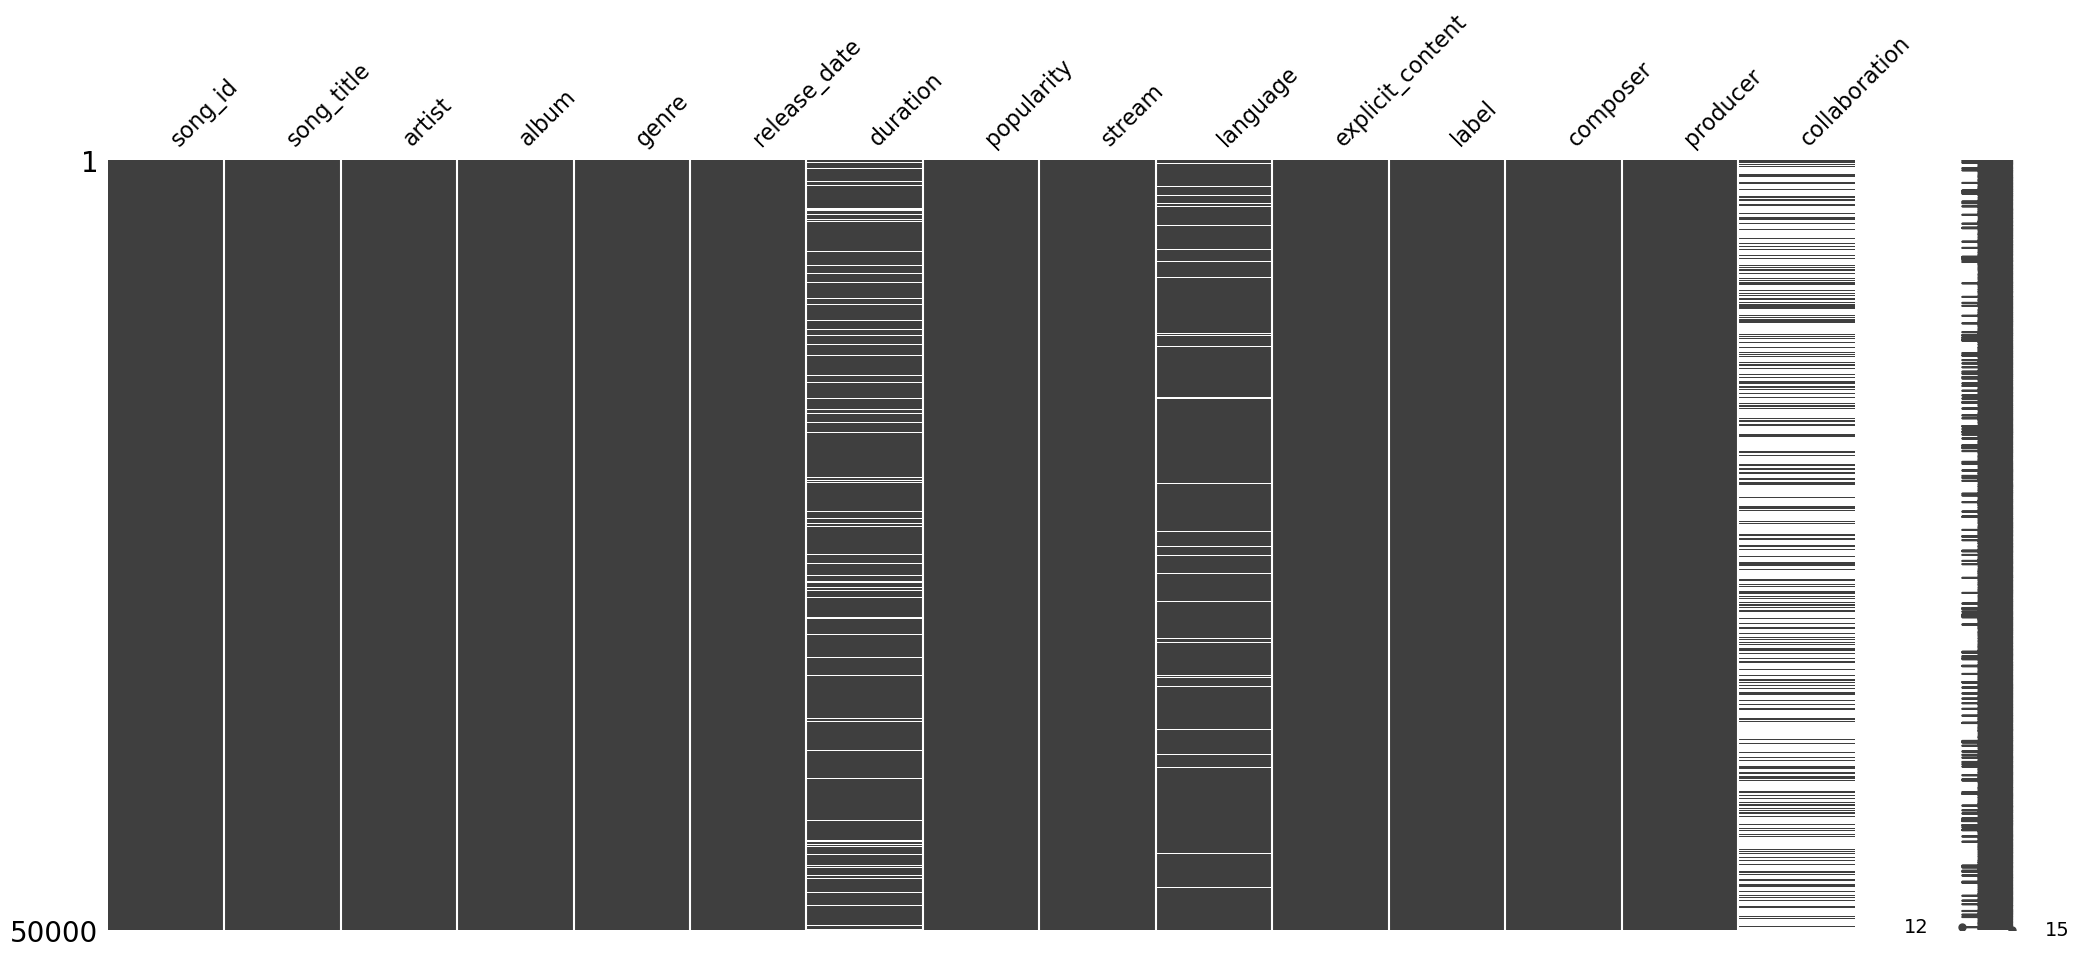

In [69]:
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#24C06A'> <b>Sütunların Düzenlenmesi</b><font color='black'> 

In [71]:
df.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

## <font color='#31DA7A'> <b>"song_title" Sütunu</b><font color='black'> 

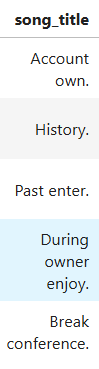

**Şarkı adlarının sonunda noktalar (.) bulunmaktadır. Bu noktaları kaldırılmalıdır.**

In [74]:
df["song_title"] = df["song_title"].str.strip('.')

Ayrıca şarkı adlarındaki tüm kelimelerin ilk harflerini büyük yazalım.

In [76]:
df["song_title"] = df["song_title"].str.title()

In [77]:
df.song_title.nunique()

46396

In [78]:
df.song_title.dtype

dtype('O')

## <font color='#31DA7A'> <b>"artist" Sütunu</b><font color='black'> 

In [80]:
df.artist.nunique()

40182

In [81]:
df.artist.dtype

dtype('O')

## <font color='#31DA7A'> <b>"album" Sütunu</b><font color='black'> 

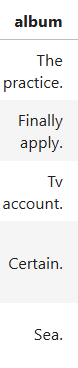

**Albüm adlarının sonunda da noktalar (.) bulunmaktadır. Bu noktalar da kaldırılmalıdır.**

In [84]:
df["album"] = df["album"].str.strip('.')

Ayrıca albüm adlarındaki tüm kelimelerin ilk harflerini de büyük yazalım.

In [86]:
df["album"] = df["album"].str.title()

## <font color='#31DA7A'> <b>"genre" Sütunu</b><font color='black'> 

In [88]:
df.genre.nunique()

9

In [89]:
df.genre.unique()

array(['Electronic', 'Pop', 'Hip-Hop', 'Folk', 'R&B', 'Jazz', 'Classical',
       'Country', 'Reggae'], dtype=object)

## <font color='#31DA7A'> <b>"release_date" Sütunu</b><font color='black'> 

In [91]:
df.release_date.dtype

dtype('O')

In [92]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [93]:
df.release_date.dtype

dtype('<M8[ns]')

## <font color='#31DA7A'> <b>"duration" Sütunu</b><font color='black'> 

In [95]:
df.duration.nunique()

366

In [96]:
df.duration.unique()

array([282., 127.,  nan, 214., 273., 312., 336., 237., 216., 161., 345.,
       131., 231., 230., 280., 129., 314., 173., 293., 256., 186., 271.,
       274., 323., 188., 211., 288., 260., 184., 194., 201., 246., 319.,
       196., 238., 110., 223., 150., 240., 252., 234., 267., 324., 382.,
       268., 299., 249., 242., 243., 316., 159., 241., 300., 347., 185.,
       169., 207., 205., 278., 235., 263., 204., 158.,  94., 208., 220.,
       179., 247., 176., 285., 259., 261., 149., 250., 136., 193., 217.,
       289., 258., 359., 275., 295., 180., 257., 266., 244., 222., 190.,
       224., 301., 302., 287., 292., 236., 254., 227., 233., 352., 177.,
       283., 290., 239., 202., 294., 183., 269., 272., 318., 141., 198.,
       182., 277., 174., 221., 191., 305., 335., 308., 212., 232., 297.,
       317., 265., 155., 181., 276., 327., 166., 311., 248., 322., 213.,
       206., 178., 270., 262., 368., 228., 219., 215., 255., 199., 151.,
       304., 195., 281., 245., 279., 329., 172., 33

"duration" sütunundaki NaN değerlerini doldurduktan sonra sütunun tipini float yerine integer olarak değiştireceğiz.

## <font color='#31DA7A'> <b>"popularity" Sütunu</b><font color='black'> 

Popülerlik puanının 1 ile 100 arasında olması gerekmektedir. Buna göre hatalı değerlerin olup olmadığını kontrol edelim.

In [100]:
df.popularity.min()

1

In [101]:
df.popularity.max()

100

In [102]:
df.popularity.nunique()

100

In [103]:
df.popularity.dtype

dtype('int64')

"popularity" sütunu şimdilik normal görünmektedir.

## <font color='#31DA7A'> <b>"stream" Sütunu</b><font color='black'> 

In [106]:
df.stream.nunique()

49989

In [107]:
df.stream.dtype

dtype('int64')

"stream" sütunu şimdilik normal görünmektedir.

## <font color='#31DA7A'> <b>"language" Sütunu</b><font color='black'> 

In [110]:
df.language.nunique()

7

In [111]:
df.language.unique()

array(['English', nan, 'Japanese', 'Spanish', 'German', 'French',
       'Korean', 'Italian'], dtype=object)

"language" sütunundaki NaN değerlerini doldurduktan sonra sütunun türünü object'ten string veya category'ye dönüştüreceğiz.

## <font color='#31DA7A'> <b>"explicit_content" Sütunu</b><font color='black'> 

In [114]:
df.explicit_content.nunique()

2

In [115]:
df.explicit_content.unique()

array(['Yes', 'No'], dtype=object)

"explicit_content" sütunu şimdilik normal görünmektedir.

## <font color='#31DA7A'> <b>"label" Sütunu</b><font color='black'> 

In [118]:
df.label.nunique()

6

In [119]:
df.label.unique()

array(['Def Jam', 'Universal Music', 'Sony Music', 'Indie',
       'Atlantic Records', 'Warner Music'], dtype=object)

"label" sütunu şimdilik normal görünmektedir.

## <font color='#31DA7A'> <b>"composer" Sütunu</b><font color='black'> 

In [122]:
df.composer.nunique()

40314

In [123]:
df.composer.dtype

dtype('O')

"composer" sütunu şimdilik normal görünmektedir.

## <font color='#31DA7A'> <b>"producer" Sütunu</b><font color='black'> 

In [126]:
df.producer.nunique()

40304

In [127]:
df.producer.dtype

dtype('O')

"producer" sütunu şimdilik normal görünmektedir.

## <font color='#31DA7A'> <b>"collaboration" Sütunu</b><font color='black'> 

In [130]:
df.collaboration.nunique()

13737

In [131]:
df.collaboration.dtype

dtype('O')

<a id='nan-values'></a>
# <font color='#24C06A'> <b>NaN Değerler</b><font color='black'> 

In [133]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

## <font color='#31DA7A'> <b>"duration" Sütunundaki NaN Değerler</b><font color='black'> 

In [135]:
df.duration.isnull().sum()

5000

In [136]:
df.duration.mean()

239.65917777777778

In [137]:
df.duration.median()

240.0

In [138]:
df.groupby("genre")["duration"].mean().round(0)

genre
Classical     239.0
Country       239.0
Electronic    240.0
Folk          240.0
Hip-Hop       240.0
Jazz          240.0
Pop           239.0
R&B           240.0
Reggae        241.0
Name: duration, dtype: float64

In [139]:
df['duration'] = df['duration'].fillna(df.groupby('genre')['duration'].transform('mean').round(0))

In [140]:
df.duration.isnull().sum()

0

## <font color='#31DA7A'> <b>"language" Sütunundaki NaN Değerler</b><font color='black'> 

In [142]:
df.language.isnull().sum()

2500

In [143]:
df.language.mode()[0]

'English'

In [144]:
df.groupby('genre')['language'].value_counts()

genre       language
Classical   English     1720
            Spanish      258
            French       105
            Korean       104
            Italian       99
            German        71
            Japanese      70
Country     English     1681
            Spanish      218
            French       112
            Korean       112
            Italian      103
            Japanese      85
            German        78
Electronic  English     8352
            Spanish     1183
            French       662
            Korean       581
            Italian      460
            German       343
            Japanese     319
Folk        English     1688
            Spanish      241
            Korean       135
            French       116
            Italian       94
            German        80
            Japanese      68
Hip-Hop     English     8178
            Spanish     1156
            French       592
            Korean       581
            Italian      466
            Japanese  

In [145]:
df['language'] = df['language'].fillna(df.groupby('genre')['language'].transform(lambda x: x.mode()[0]))

In [146]:
df.language.isnull().sum()

0

## <font color='#31DA7A'> <b>"collaboration" Sütunundaki NaN Değerler</b><font color='black'> 

In [148]:
df.collaboration.isnull().sum()

35000

Bu veri kümesi **ChatGPT** tarafından oluşturuldu. Bu nedenle işbirliği yapılmışsa işbirliği sütununda değerler bulunmaktadır. **Eğer işbirliği yoksa satırlar NaN değeri olarak girilmiştir.** Bu nedenle NaN değerlerini **"No Collaboration"** (İşbirliği Yok) olarak doldurmak daha anlamlı olacaktır.

In [150]:
df["collaboration"] = df["collaboration"].fillna("No Collaboration")

In [151]:
df.collaboration.isnull().sum()

0

In [152]:
# NaN değerleri doldurduktan sonra
df.isnull().sum()

song_id             0
song_title          0
artist              0
album               0
genre               0
release_date        0
duration            0
popularity          0
stream              0
language            0
explicit_content    0
label               0
composer            0
producer            0
collaboration       0
dtype: int64

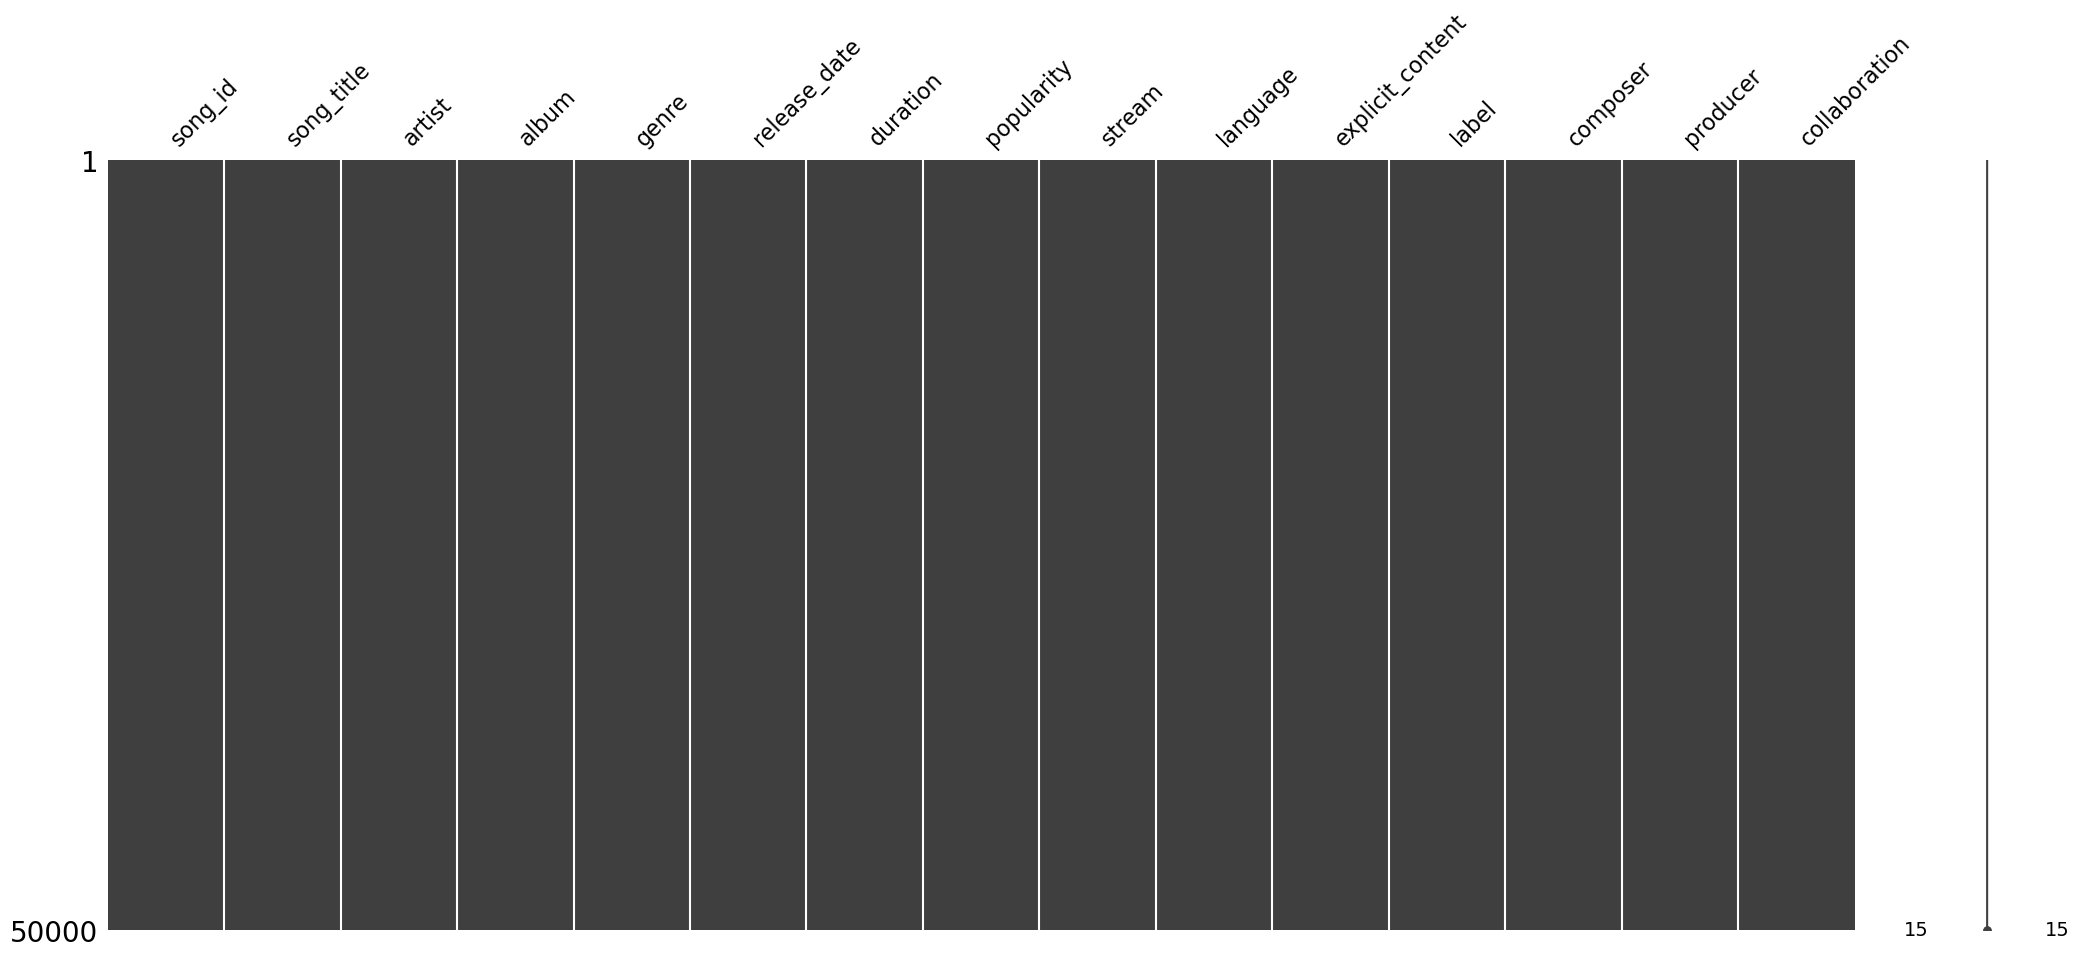

In [153]:
msno.matrix(df);

<a id='data-visualization'></a>
# <font color='#24C06A'> <b>Veri Görselleştirme</b><font color='black'> 

In [155]:
# Pastel bir renk paleti tanımlama (yeşiller ve tamamlayıcı pastel renkleri olmak üzere)
colors = ['#A3D2A3', '#E6B3B3', '#C7E1A6', '#B3E0E0', '#A0D7D7', '#C2C7E1', '#D9E1C3', '#A3C1AD', '#A2D6A6', '#B3E5BB']

## <font color='#31DA7A'> <b>Müzik Türlerinin Dağılımı</b><font color='black'> 

In [157]:
genre_counts = df.genre.value_counts()
genre_counts

genre
Electronic    12568
Pop           12534
Hip-Hop       12298
Folk           2559
Classical      2542
Country        2511
Jazz           2504
R&B            1513
Reggae          971
Name: count, dtype: int64

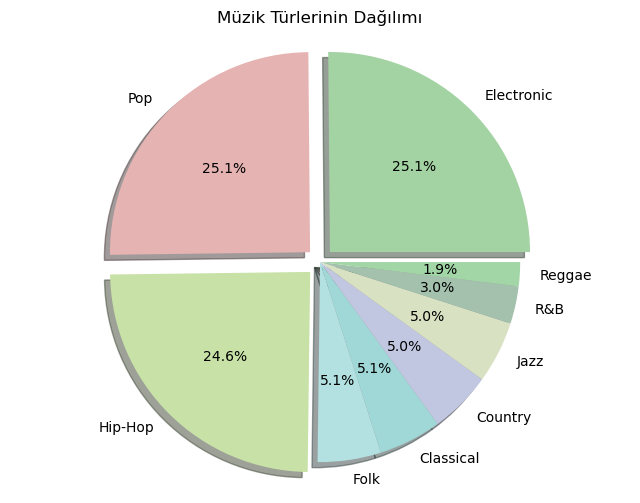

In [158]:
# Pasta grafiğinin oluşturulması
plt.figure(figsize=(8, 6))
plt.pie(genre_counts,
        labels=genre_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        shadow= True,
        explode= [0.07, 0.07, 0.07, 0, 0, 0, 0, 0, 0]
       )

plt.title('Müzik Türlerinin Dağılımı')
plt.axis('equal')  # Eşit en boy oranı, pasta grafiğinin dairesel olmasını sağlar

plt.show()

Grafik, müzik türlerinin dinleyici kitlesi ve üretim sıklığı açısından önemli ipuçları vermektedir. **Pop müzik, %26.1 ile en büyük paya sahip**; bu da geniş bir dinleyici kitlesine hitap ettiğini ve piyasanın büyük ölçüde bu türde üretim yaptığını göstermektedir. **Hip Hop (%24.4) ve Dance/Electronic (%23.3)** türleri de popülerlik açısından öne çıkmakta ve özellikle genç dinleyici kitlesinin tercihi olabileceğini düşündürmektedir. Gospel, Reggae ve Country gibi türler düşük oranlarla temsil edilmekte, bu da bu türlerin niş bir dinleyici kitlesine hitap ettiğini veya küresel piyasada görece daha az yaygın olduklarını göstermektedir.

## <font color='#31DA7A'> <b>Şarkıların Sürelerinin Dağılımı</b><font color='black'> 

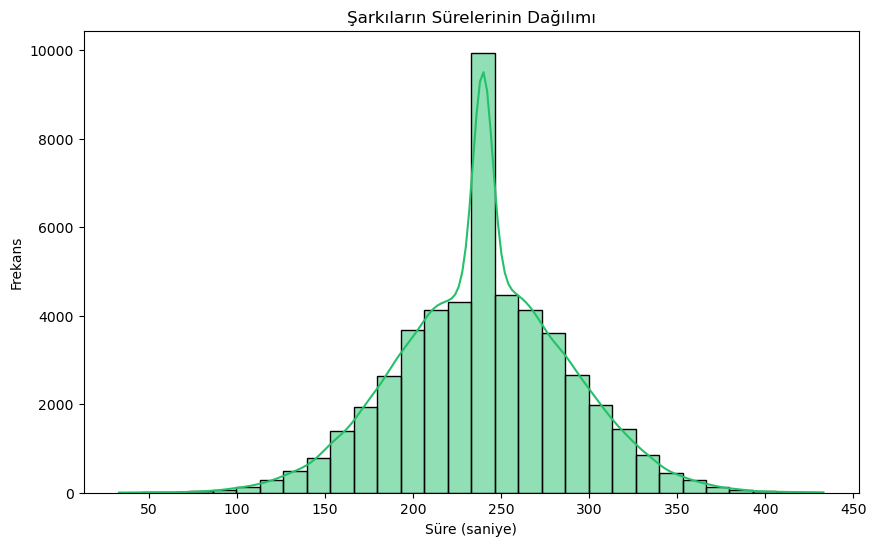

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True, color= "#24C06A")

plt.title("Şarkıların Sürelerinin Dağılımı")
plt.xlabel('Süre (saniye)')
plt.ylabel('Frekans')

plt.show()

Şarkı sürelerine bakıldığında, histogramın simetrik bir dağılım sergilediği görülmektedir. Ortalama süre **200-250 saniye** arasında yoğunlaşmıştır; bu da dinleyici ilgisini kaybetmeden, kısa sürede duygusal etki bırakacak şekilde tasarlanan modern müzik trendini destekler niteliktedir. 3-4 dakikalık bir sürenin optimal olduğu anlaşılmakla beraber bu sürenin dışındaki ekstrem değerlerin nadir olması, müzik endüstrisinde belirli bir standartlaşma olduğuna işaret etmektedir.

## <font color='#31DA7A'> <b>Türe Göre Ortalama Popülerlik</b><font color='black'> 

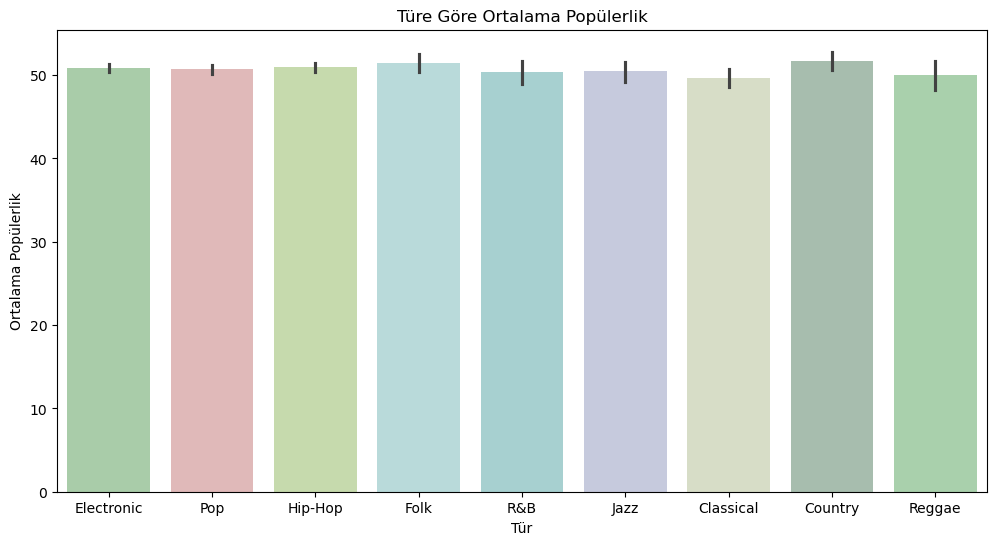

In [164]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genre',
            y='popularity',
            data=df,
            estimator='mean',
            palette= colors
           )

plt.title('Türe Göre Ortalama Popülerlik')
plt.xlabel('Tür')
plt.ylabel('Ortalama Popülerlik')

plt.show()

**Farklı türlerin popülerlik oranları arasındaki farkların oldukça düşük olduğu gözlemlenmektedir**. Ancak **Pop, Dance ve Hip Hop** gibi türlerin popülerliğinin biraz daha yüksek olması, bu türlerin dijital platformlar ve sosyal medyada daha çok paylaşıldığını veya tüketildiğini gösteriyor olabilir. Bu, özellikle genç kullanıcıların popüler kültüre olan ilgisini yansıtmaktadır. Buna karşılık diğer türlerin de genel popülerlikte kayda değer bir varlığı söz konusudur. Bu da müzik zevkinin çeşitlendiğini göstermektedir.

## <font color='#31DA7A'> <b>Yıllara Göre Yayınlanan Şarkı Sayısı</b><font color='black'> 

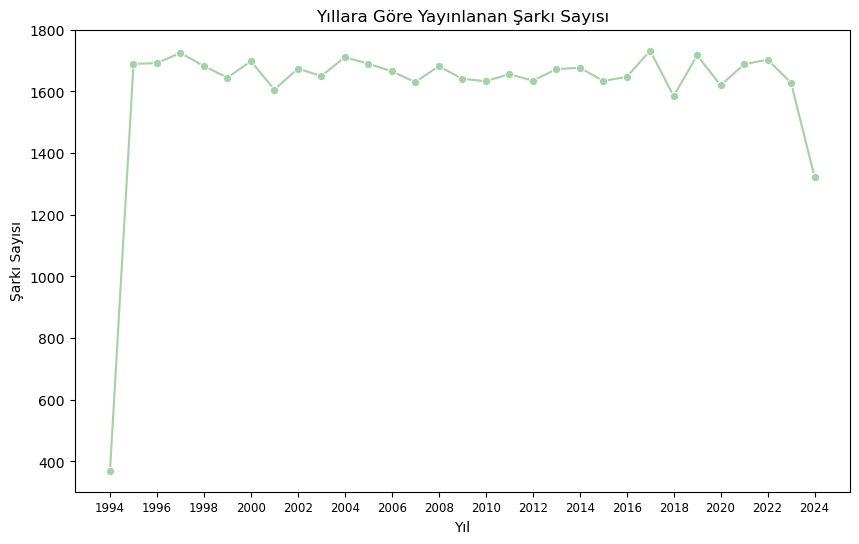

In [167]:
# Release_date'ten yılı alma
df['release_year'] = df['release_date'].dt.year

# Her yıl yayınlanan şarkıların sayısını bulma
songs_per_year = df['release_year'].value_counts().sort_index()

# Bir zaman serisi grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker='o', color= '#A3D2A3')

plt.title('Yıllara Göre Yayınlanan Şarkı Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.xticks(np.arange(df['release_year'].min(), df['release_year'].max()+1, 2), size= 8.5)

plt.show()

Yıllık şarkı çıkışlarında genel olarak istikrarlı bir eğilim gözlemlenmektedir. Ancak son yıllarda görülen hafif düşüş de dikkat çekmektedir. Bu, müzik üretiminde dijitalleşmenin etkisiyle birlikte pandemi gibi küresel olayların müzik endüstrisine etkisiyle de ilişkili olabilmektedir. Dijital platformlar, bağımsız sanatçıların daha fazla şarkı yayınlamasına olanak sağlarken, pandeminin yaratıcı üretimi yavaşlatmış olabileceği düşünülmektedir.

## <font color='#31DA7A'> <b>Şarkı Sayısına Göre En Çok Şarkıya Sahip 10 Şarkıcı</b><font color='black'> 

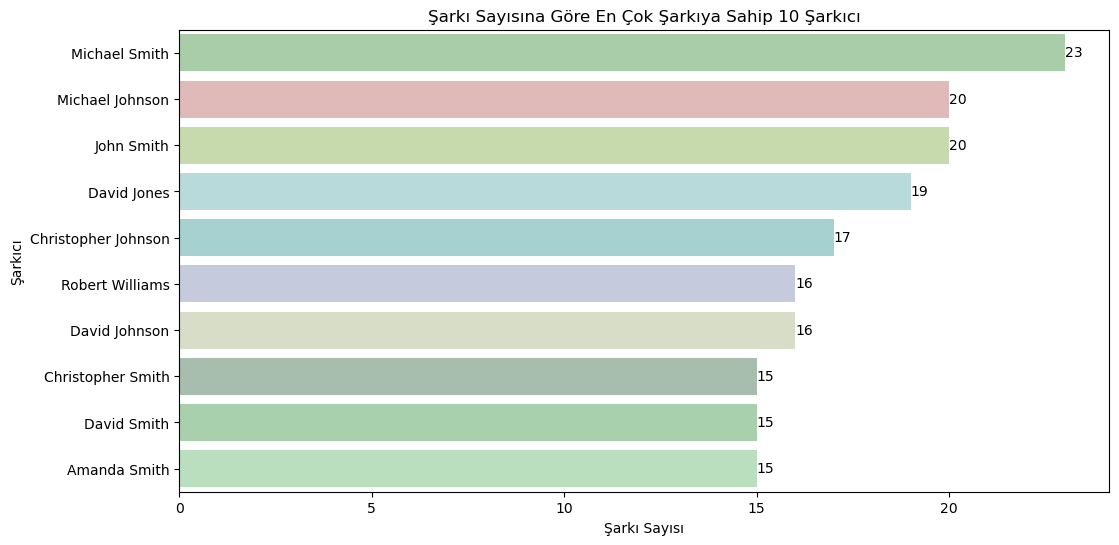

In [170]:
# Sanatçı başına şarkı sayısını bulma
top_artists = df.groupby('artist').size().reset_index(name='song_count')
top_artists = top_artists.sort_values(by='song_count', ascending=False).head(10)  # Top 10 artists

# Bar plot oluşturma
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='song_count',
                  y='artist',
                  data=top_artists,
                  palette= colors
                 )

for container in ax1.containers:
    ax1.bar_label(container)

plt.title('Şarkı Sayısına Göre En Çok Şarkıya Sahip 10 Şarkıcı')
plt.xlabel('Şarkı Sayısı')
plt.ylabel('Şarkıcı')

plt.show()

Grafikte, en üretken sanatçılar arasında **Michael Smith** 23 şarkı ile başı çekmekte ve onu **Michael Johnson ve John Smith** 20’şer şarkıyla takip etmektedir. Bu veriler, bu isimlerin müzik endüstrisinde oldukça aktif ve üretken olduklarını göstermektedir. Özellikle Michael isimli sanatçılar listede yoğun olarak yer almaktadır; bu da bazı isimlerin sektörde daha fazla temsil edildiği veya ortak isimler nedeniyle verilerin farklı bireylerle karışmış olabileceğini düşündürmektedir.

Ayrıca, David ve Christopher isimli sanatçılar da birkaç farklı varyasyonla listede öne çıkmaktadır. Bu sanatçılar, piyasa üzerinde sürekli varlık göstererek geniş bir dinleyici kitlesi kazanmış ve popüler kalmış olabilirler. Amanda Smith ise listede yer alan tek kadın sanatçı olarak dikkat çekmektedir, bu da kadın sanatçıların aynı üretkenlikle listede daha az yer aldığına işaret ediyor olabilir.

## <font color='#31DA7A'> <b>Şarkı Dillerinin Dağılımı</b><font color='black'> 

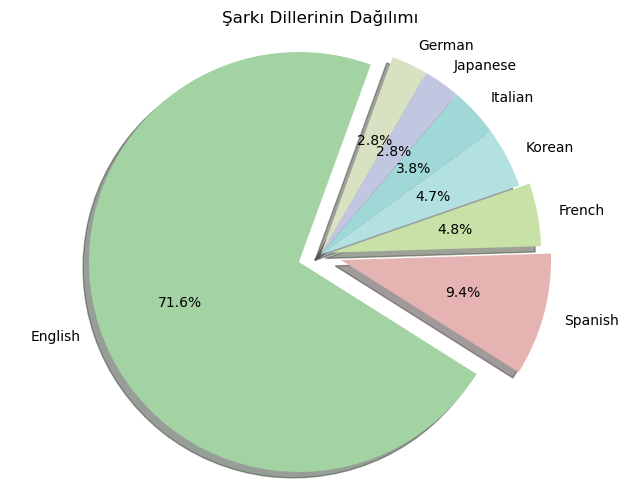

In [173]:
language_count = df.language.value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.pie(language_count,
        labels=language_count.index,
        autopct='%1.1f%%',
        colors=colors,
        shadow= True,
        explode= [0.11, 0.1, 0.05, 0, 0, 0, 0],
        startangle= 70
       )

plt.title('Şarkı Dillerinin Dağılımı')
plt.axis('equal')

plt.show()

Dil dağılımında **İngilizce, %61.9** ile baskın bir dil olarak karşımıza çıkmaktadır. Bu, küresel müzik pazarının İngilizce içerik tarafından domine edildiğini ve diğer dillerin (İspanyolca, Fransızca gibi) daha niş kitlelere hitap ettiğini göstermektedir. İngilizce, uluslararası erişim sağlayarak şarkıların daha geniş bir kitleye ulaşmasını sağlamaktadır. Bu eğilim, müzik endüstrisinin küresel boyutta tek bir dil etrafında birleştiğini ve sanatçıların geniş kitlelere hitap etmek için İngilizce şarkı yapmayı tercih ettiğini göstermektedir.

## <font color='#31DA7A'> <b>Dile Göre Popülerlik</b><font color='black'> 

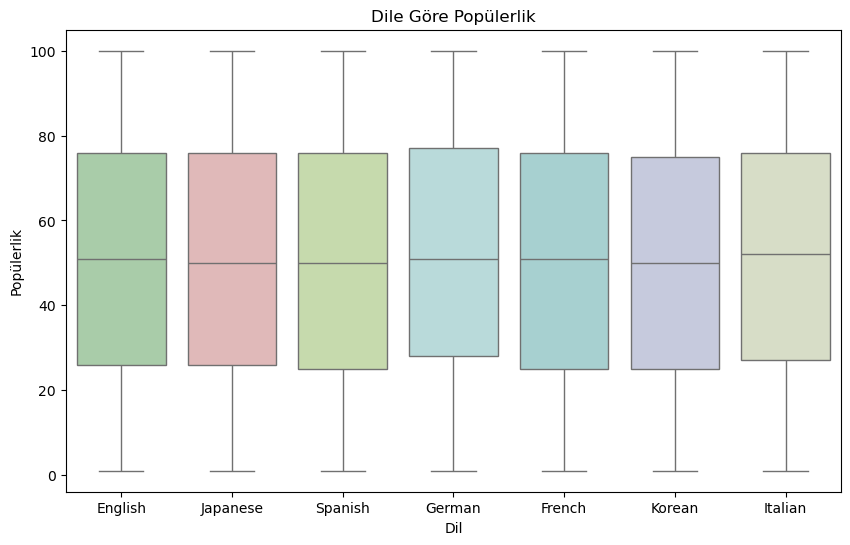

In [176]:
# Dil ve popülerlik açısından bir kutu grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='language',
            y='popularity',
            data=df,
            palette= colors
           )

plt.title('Dile Göre Popülerlik')
plt.xlabel('Dil')
plt.ylabel('Popülerlik')

plt.show()

Bu grafikte farklı dillerdeki şarkıların popülaritesini gösteren bir kutu grafiği (box plot) görülmektedir.

 - **Ortalama Popülarite:** Dillerin ortalama popülaritesi (medyan) benzer aralıklarda yer almaktadır. Tüm dillerde medyan popülarite değeri 40 ile 60 arasında. Bu, genel olarak diller arasında büyük bir fark olmadığını göstermektedir.
 - **Dağılım Genişliği:** Kutuların boyutları ve üst-alt bıyık uzunlukları (whisker) popülarite dağılımlarının çeşitlilik gösterdiğini ifade etmektedir. Popülarite, çoğu dilde 0 ile 100 arasında değişmekte ve herhangi bir ekstrem uç değer gözlemlenmemektedir.
 - **Dillerin Karşılaştırması:** Dillerin dağılımlarına baktığımızda, Japonca, İspanyolca ve Korece şarkıların popülarite dağılımları biraz daha geniş gibi görünmektedir. Bu da bu dillerde popülaritenin daha çeşitlilik gösterdiğini ifade ediyor olabilir.

Genel olarak, diller arasındaki popülarite farkı çok belirgin değildir, ancak bazı dillerde daha fazla çeşitlilik ve geniş dağılımlar dikkat çekmektedir.

## <font color='#31DA7A'> <b>2024'te En Çok Dinlenen 10 Albüm</b><font color='black'> 

In [251]:
# 2024'te çıkan albümleri filtreleme
df_2024 = df[df['release_year'] == 2024]

# Albümleri dinlenme sayısına göre gruplama ve en yüksek dinlenen 10 albümü seçme
top10_album = df_2024.groupby("album")["stream"].max().sort_values(ascending=False)[:10]
top10_album

album
Run Gas           99959819
Around            99850936
Successful        99683102
Usually Hotel     99646051
Risk              99363394
Way Discussion    99235057
Parent            99172958
Benefit           99146835
Particular His    99111953
Act               98986205
Name: stream, dtype: int64

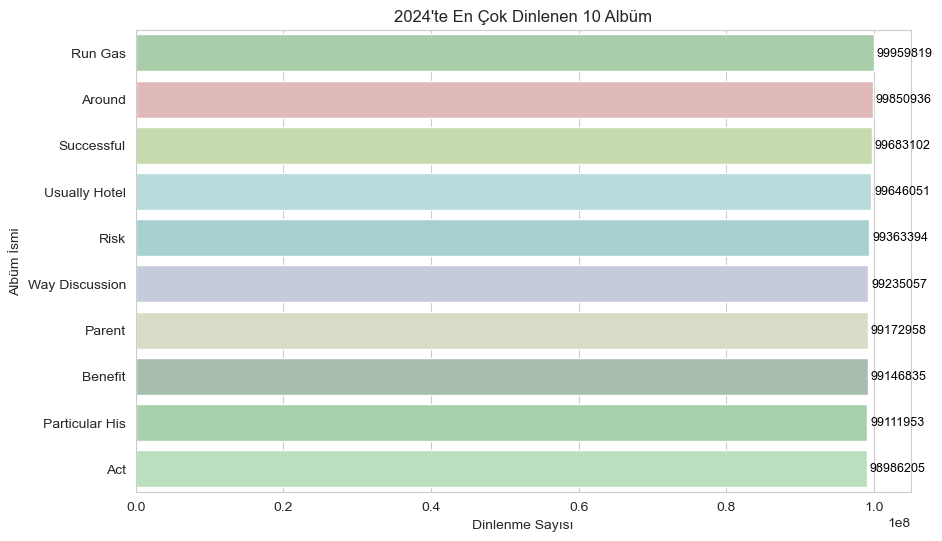

In [255]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax2 = sns.barplot(x=top10_album.values, y=top10_album.index, palette= colors)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax2.set(xlabel='Dinlenme Sayısı', ylabel='Albüm İsmi')
plt.title("2024'te En Çok Dinlenen 10 Albüm")

plt.show()

**"Run Gas"** albümü 99,959,819 dinlenme ile listenin zirvesinde yer almaktadır. Onu **"Around" ve "Successful"** albümleri çok yakın dinlenme sayılarıyla takip etmektedir. En çok dinlenen albümlerin bu kadar yüksek dinlenme sayılarına ulaşması, bu albümlerin güçlü bir şekilde pazara sunulduğunu, geniş bir dinleyici kitlesine hitap ettiğini ve büyük ihtimalle popüler kültürde önemli bir yer edindiğini göstermektedir. İlk 10 albüm arasındaki farkların az olması, bu albümlerin hepsinin yüksek popülerlikte olduğunu ve dinleyici ilgisini çekmekte birbirine yakın başarı gösterdiklerini düşündürmektedir.

## <font color='#31DA7A'> <b>Explicit Content Dağılımı</b><font color='black'> 

In [260]:
e_content = df.explicit_content.value_counts()
e_content

explicit_content
Yes    25083
No     24917
Name: count, dtype: int64

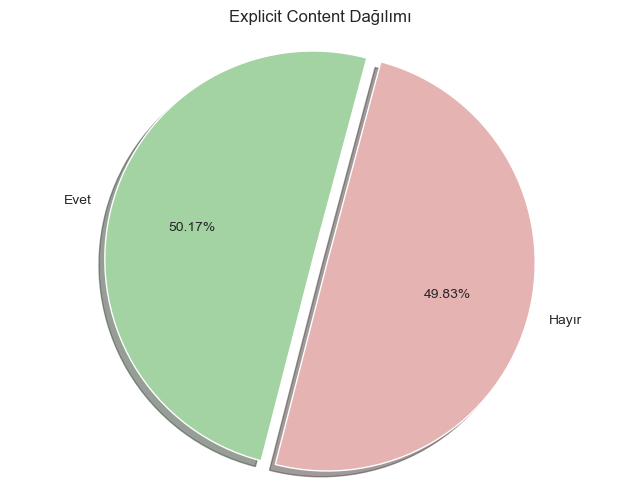

In [264]:
# Pasta grafiğinin çizilmesi
plt.figure(figsize=(8, 6))
plt.pie(e_content,
        labels= ["Evet", "Hayır"],
        autopct='%1.2f%%',
        colors=colors,
        shadow= True,
        explode= [0.07, 0],
        startangle= 75
       )

plt.title('Explicit Content Dağılımı')
plt.axis('equal')

plt.show()

Explicit (açık içerik) içeren şarkılar **%50.17 ile küçük bir farkla da olsa "Yes" kategorisinde daha fazla yer almaktadır.** Bu, müzik endüstrisinde açık içerikli şarkıların oldukça yaygın olduğunu ve neredeyse yarı yarıya oranla temiz içerikli şarkılarla yarıştığını göstermektedir. Bu durum, özellikle genç ve yetişkin dinleyici kitlesine hitap eden daha doğrudan ve cesur içeriklerin talep gördüğünü, ancak aynı zamanda her yaş grubuna uygun içeriklere de dikkat edildiğini yansıtmaktadır.

## <font color='#31DA7A'> <b>Plak Şirketlerinin Şarkı Dağılımı</b><font color='black'> 

In [268]:
label_count = df.label.value_counts()
label_count

label
Def Jam             8501
Indie               8411
Sony Music          8394
Atlantic Records    8289
Warner Music        8243
Universal Music     8162
Name: count, dtype: int64

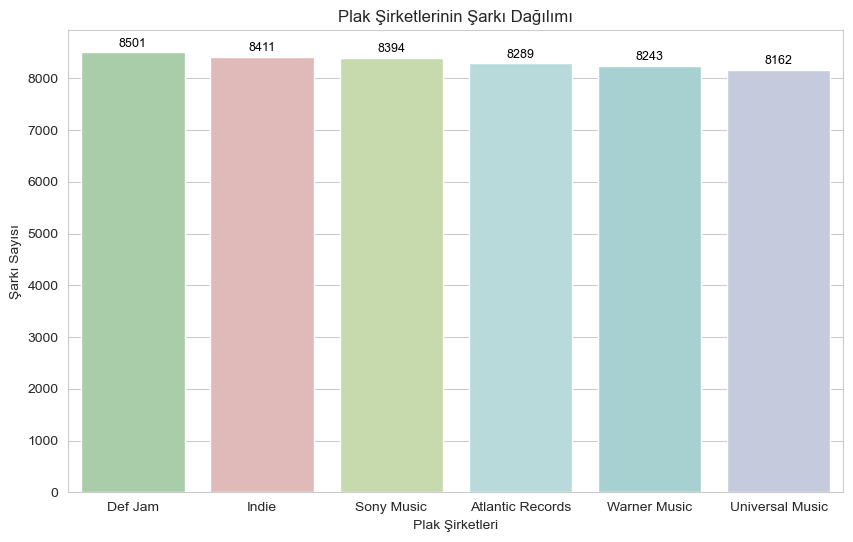

In [270]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax3 = sns.barplot(x=label_count.index, y=label_count.values, palette= colors)

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax3.set(xlabel='Plak Şirketleri', ylabel='Şarkı Sayısı')
plt.title("Plak Şirketlerinin Şarkı Dağılımı")

plt.show()

En çok şarkıya sahip plak şirketi, **8501 şarkıyla Def Jam** olurken, onu **Indie, Sony Music, Atlantic Records ve Warner Music** gibi büyük şirketler takip etmektedir. Def Jam ve diğer büyük şirketlerin sektördeki etkisi gözle görülürken, bağımsız (Indie) şirketlerinde en üst sıralarda yer alması dikkat çekicidir. Bu durum, bağımsız sanatçılar ve küçük plak şirketlerinin dijital platformlarda büyük şirketlerle rekabet edebildiğini ve kendi dinleyici kitlesini bulduğunu göstermektedir.

## <font color='#31DA7A'> <b>Yayınlanan Şarkı Sayısına Göre En Çok Şarkıya Sahip 10 Besteci</b><font color='black'> 

In [273]:
top10_composer = df.composer.value_counts()[:10]
top10_composer

composer
Michael Smith       21
Michael Jones       21
Michael Williams    20
Robert Smith        19
John Smith          18
James Jones         17
Michael Davis       16
Jennifer Smith      15
Brian Smith         14
Jennifer Johnson    14
Name: count, dtype: int64

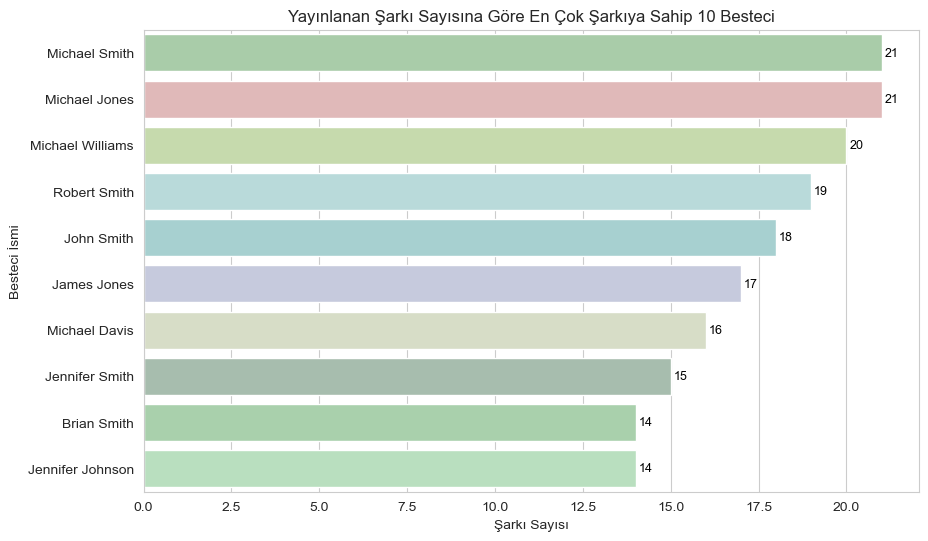

In [275]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax4 = sns.barplot(x=top10_composer.values, y=top10_composer.index, palette= colors)

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax4.set(xlabel='Şarkı Sayısı', ylabel='Besteci İsmi')
plt.title("Yayınlanan Şarkı Sayısına Göre En Çok Şarkıya Sahip 10 Besteci")

plt.show()

En üst sırada, **21’er şarkıyla Michael Smith ve Michael Jones** yer almaktadır. Michael ismine sahip bestecilerin listede baskın olması, sektör içerisinde isimlerin sıklıkla benzer olmasından kaynaklanıyor olabilir ve bu durum analizde bireysel katkıyı ayırt etmek için dikkat gerektirmektedir. Jennifer Smith ve Jennifer Johnson gibi kadın bestecilerin de listede yer alması, kadın bestecilerin sektörde güçlü bir şekilde temsil edildiğini göstermektedir. Bu besteciler, yüksek üretkenlikleri sayesinde sektörde geniş bir kitleye hitap etmektedir.

## <font color='#31DA7A'> <b>Yayınlanan Şarkı Sayısına Göre En Çok Şarkıya Sahip 10 Yapımcı</b><font color='black'> 

In [278]:
top10_producers = df.producer.value_counts()[:10]
top10_producers

producer
Michael Smith        27
Michael Johnson      18
Christopher Smith    16
James Johnson        16
John Brown           14
Jennifer Johnson     14
Jennifer Smith       13
Amanda Smith         13
James Smith          13
David Johnson        13
Name: count, dtype: int64

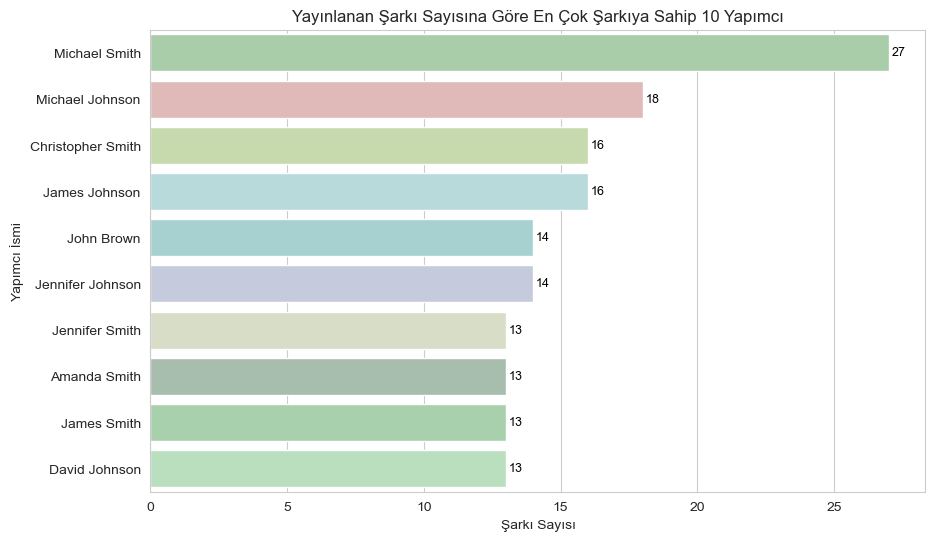

In [280]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax5 = sns.barplot(x=top10_producers.values, y=top10_producers.index, palette= colors)

for container in ax5.containers:
    ax5.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax5.set(xlabel='Şarkı Sayısı', ylabel='Yapımcı İsmi')
plt.title("Yayınlanan Şarkı Sayısına Göre En Çok Şarkıya Sahip 10 Yapımcı")

plt.show()

**Michael Smith, 27 şarkı ile en çok şarkı çıkartan yapımcı olarak öne çıkarken**, onu **Michael Johnson ve Christopher Smith** gibi isimler takip etmektedir. Burada, "Michael" ve "Smith" gibi yaygın isimlerin çokça bulunması, yapımcılar arasında isimlerin çakışması durumunu düşündürmekte ve veri analizinde dikkat edilmesi gereken bir ayrıntı olarak göze çarpmaktadır. Jennifer Johnson ve Amanda Smith gibi kadın yapımcıların listede yer alması, kadın yapımcıların da sektörde aktif olduğunu göstermektedir. Bu üretken yapımcılar, müzik endüstrisinde kalıcı etki bırakmaktadır.

## <font color='#31DA7A'> <b>En Çok İşbirliği Yapılan Sanatçılar</b><font color='black'> 

In [287]:
collab_count = df.collaboration.value_counts()[1:11] # "No Collaboration" değeri dahil edilmedi
collab_count

collaboration
James Miller        7
Michael Williams    7
David Smith         7
Michael Smith       7
Jennifer Brown      7
Michael Johnson     6
Melissa Smith       6
Jennifer Miller     6
William Lopez       6
Michael Wilson      6
Name: count, dtype: int64

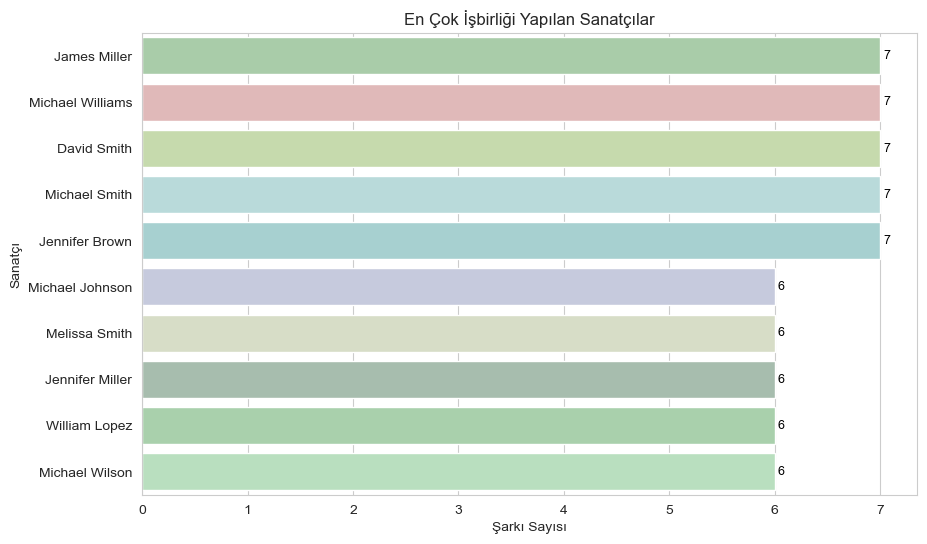

In [289]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax6 = sns.barplot(x=collab_count.values, y=collab_count.index, palette= colors)

for container in ax6.containers:
    ax6.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=2)
    
ax6.set(xlabel='Şarkı Sayısı', ylabel='Sanatçı')
plt.title("En Çok İşbirliği Yapılan Sanatçılar")

plt.show()

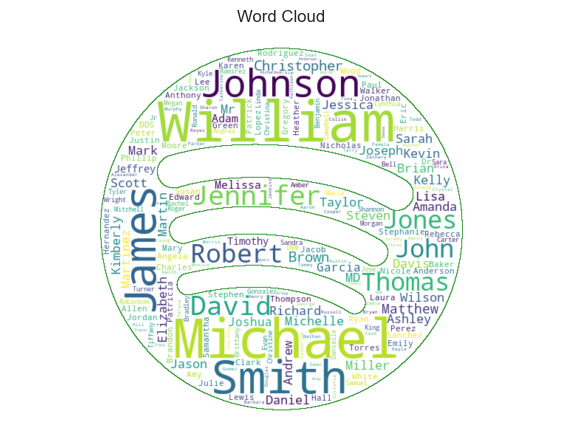

In [291]:
from wordcloud import WordCloud
from PIL import Image

# "No Collaboration" değerlerinin kaldırılması
filtered_df = df[df['collaboration'] != "No Collaboration"]

# Tüm sanatçı adlarını birleştirme
all_artists = ', '.join(filtered_df['collaboration'].tolist())

# Spotify logosunu maskeye dönüştürme
mask = np.array(Image.open('spotify_logo.jpg'))
mask = np.invert(mask)

# Maskedeki beyaz alanların belirlenmesi
mask[mask > 128] = 255  # Beyaz alanlar
mask[mask <= 128] = 0 # Siyah alanlar

# WordCloud oluşturma
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      mask=mask, 
                      contour_color='green', 
                      contour_width=1).generate(all_artists)

# Çıktı alma
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")

plt.show()

İş birliği yapılan sanatçılar arasında, **James Miller, Michael Williams, David Smith** ve diğer bazı isimler **7 iş birliği** ile en üst sırada yer almaktadır. Bu isimlerin yüksek iş birliği sayısı, onların geniş bir sanatçı ağına sahip olduğunu ve sektörde oldukça bağlantılı olduklarını göstermektedir. Wordcloud grafiği ile birlikte bu sanatçıların sektörde nasıl daha geniş bir ağa sahip olduğu görsel olarak da güçlendirilmiştir. Bu yoğun iş birlikleri, bu sanatçıların müziğin farklı türlerinde ve çeşitli projelerde yer alarak etki alanlarını genişlettiğini ortaya koymaktadır.

<a id='conclusion'></a>
# <font color='#24C06A'> <b>Sonuç</b><font color='black'> 

Bu projede, müzik endüstrisindeki verilerin daha iyi anlaşılabilmesi amacıyla veri seti üzerinde çeşitli veri hazırlama ve görselleştirme adımları gerçekleştirilmiştir. İlk olarak, veri setini daha iyi anlamak adına veriler analiz edilmiş, sütunlardaki eksik veya uyumsuz veriler düzenlenmiş, NaN (eksik) değerler uygun stratejilerle doldurulmuştur. Bu veri hazırlama süreci, analizlerin doğruluğunu artırmak ve güvenilir sonuçlar elde etmek için kritik öneme sahip olmuştur.

Ardından, veri görselleştirme adımına geçilmiş ve verilerin çeşitli grafiklerle ifade edilmesi sağlanmıştır. En çok dinlenen albümler, açık içerik dağılımı, kayıt şirketlerine göre şarkı dağılımı, en çok şarkı çıkaran besteci ve yapımcılar, en çok iş birliği yapılan sanatçılar gibi kategorilerde oluşturulan grafikler, müzik endüstrisinin yapısına dair önemli bulgular sunmuştur. Bu analizler, sanatçıların üretkenliği, kayıt şirketlerinin sektördeki konumu ve dinleyici kitlesinin açık içerikli şarkılara olan eğilimini daha net bir şekilde gözler önüne sermiştir.

Dil bazında şarkı popülaritesinin incelendiği boxplot grafiği ise, şarkı popülerliğinin dillere göre benzer bir dağılım gösterdiğini ancak Japonca, İspanyolca ve Korece şarkıların daha geniş bir popülarite aralığına sahip olduğunu ortaya koymuştur. Bu durum, bazı dillerdeki şarkıların popülarite açısından daha çeşitli bir dağılım gösterdiğine işaret etmektedir. Genel olarak, diller arasındaki popülerlik farklarının çok belirgin olmadığı gözlemlenmiştir.

Bu proje süreci, veri hazırlama ve görselleştirme adımlarının müzik verileri üzerindeki analizlerde ne kadar etkili ve önemli olduğunu göstermiştir. Elde edilen bulgular, müzik endüstrisinin farklı boyutlarına dair değerli içgörüler sunmakta ve gelecekteki analizler için sağlam bir temel oluşturmaktadır.

<p style="background-color:#198D4B;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>